In [43]:
import seaborn as sns
import scipy.io as sio
import numpy as np
from matplotlib import pyplot as plt
import os

# Retrieve data
mat_random = sio.loadmat('./benchmarks/observations3_random_normalized.mat')
data_random = mat_random['observations']

mat_learning = sio.loadmat('./benchmarks/observations4_move_in_direction_normalized.mat')
data_learning = mat_learning['observations']

mat_failed = sio.loadmat('./benchmarks/observations6_move_in_direction_failed_normalized.mat')
data_failed = mat_failed['observations']

# Keep the same number of points
N_random = len(data_random)
N_learning = len(data_learning)
N_failed = len(data_failed)

N_min = min([N_random, N_learning, N_failed])
data_random = data_random[:N_min]
data_learning = data_learning[:N_min]
data_failed = data_failed[:N_min]

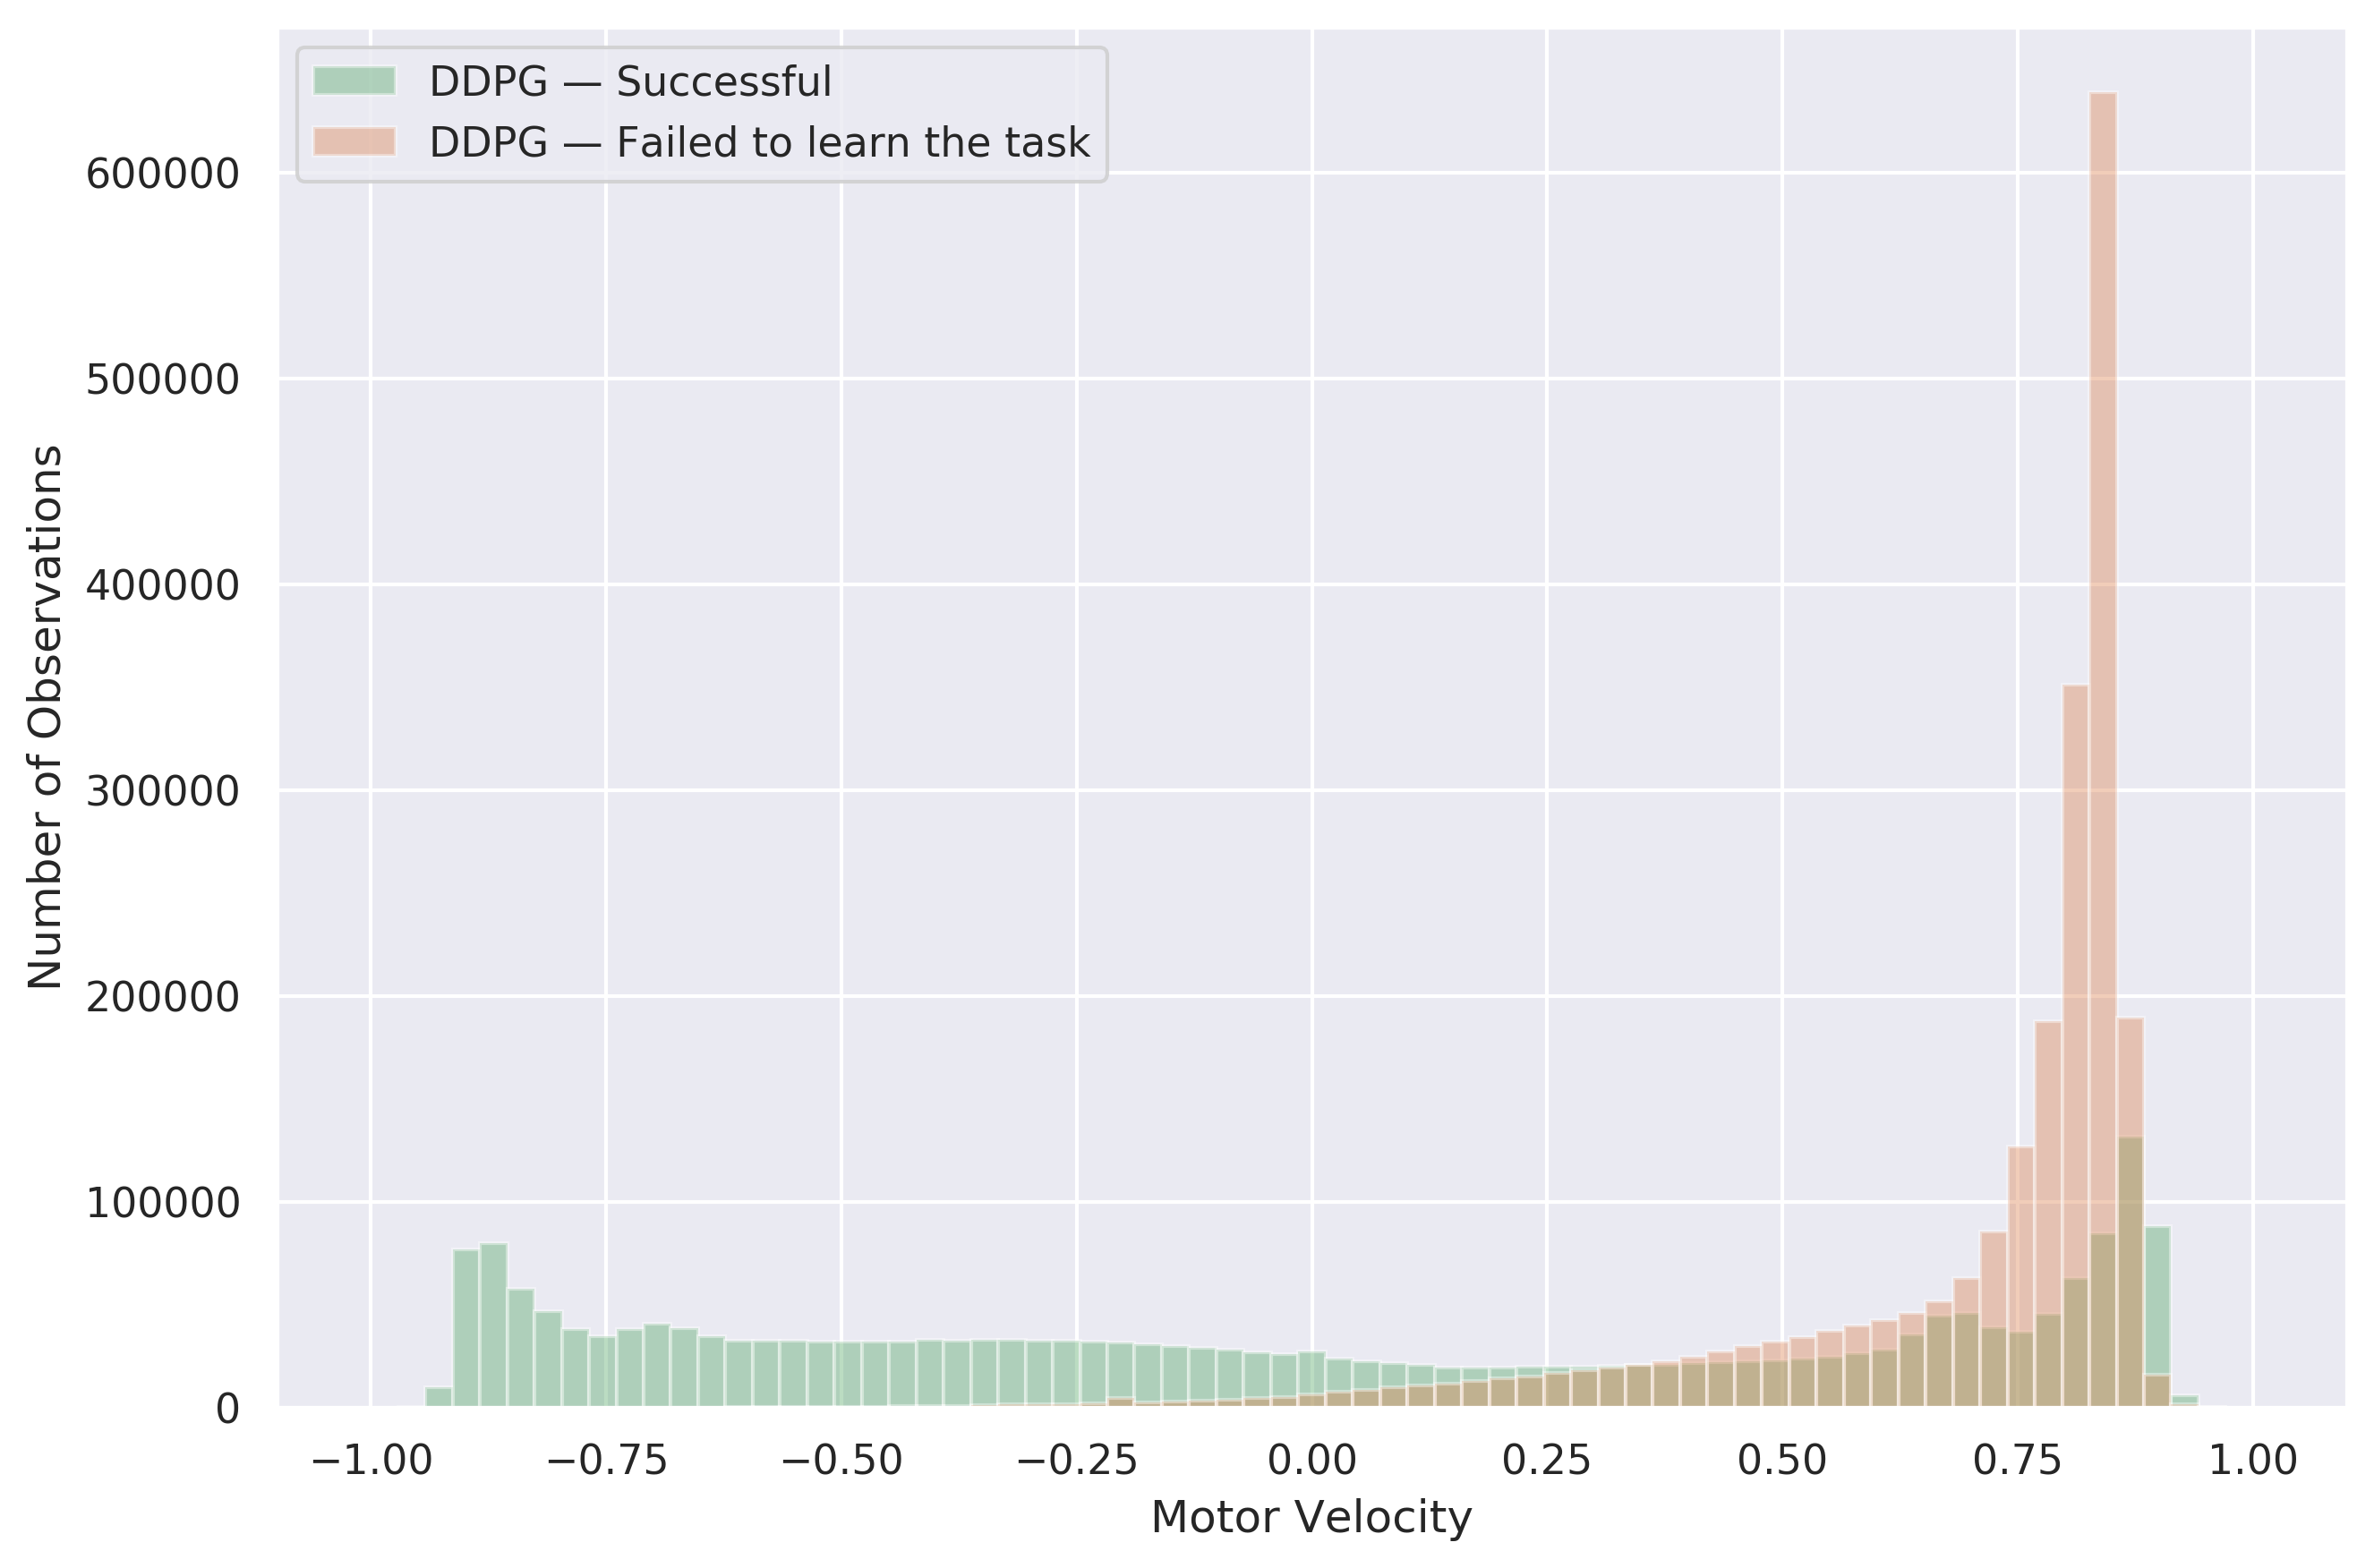

In [46]:
plt.figure(
    figsize=(9, 6),
    dpi=300
)

sns.set()
kwargs = dict(bins = np.linspace(-1, 1,70), kde=False, hist=True)
# sns.distplot(data_random.transpose()[14],
#              label="Agent taking random actions",
#              **kwargs,
#              color='b',
#              )

sns.distplot(data_learning.transpose()[14],
            label="DDPG — Successful",
            **kwargs,
            color='C2',
            )

sns.distplot(data_failed.transpose()[14],
            label="DDPG — Failed to learn the task",
            **kwargs,
            color='C1',
            )

plt.xlabel("Motor Velocity")
plt.ylabel("Number of Observations")
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join("manuscript", "figures", "fig-motor-hist.pdf"),
            dpi=300,
            bbox_inches='tight',
            pad_inches=0,
            )




The green data was collected by recording the motor velocity of a DDPG Jitterbug agent successfully learning to perform the move_in_direction task.

The orange data was collected by recording the motor velocity of a DDPG Jitterbug agent failing to learn to perform the move_in_direction task.
